### Classifier Scores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import latexcodec
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
#plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 24

Text(0.35, 6, '$\\text{Model 2}$')

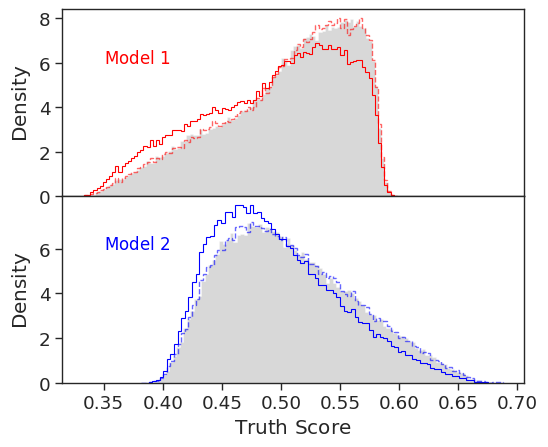

In [2]:
import numpy as np
import matplotlib.pyplot as plt

base_a = 0.72
base_b = 0.88
base_a_2 = 0.64
base_b_2 = 1.08

truth_scores = np.load(f"./paper_data/classifier_{base_a}_{base_b}_exp_scores.npy")
base_scores = np.load(f"./paper_data/classifier_{base_a}_{base_b}_sim_scores.npy")
truth_weights = np.load(f"./paper_data/reweights_{base_a}_{base_b}.npy")
truth_scores_2 = np.load(f"./paper_data/classifier_{base_a_2}_{base_b_2}_exp_scores.npy")
base_scores_2 = np.load(f"./paper_data/classifier_{base_a_2}_{base_b_2}_sim_scores.npy")
truth_weights_2 = np.load(f"./paper_data/reweights_{base_a_2}_{base_b_2}.npy")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

bins = 100

# Top subplot
ax1.hist(truth_scores, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax1.hist(base_scores, bins=bins, histtype='step', color='red', density=True, label=r'$(0.72, 0.88)$')
ax1.hist(base_scores, weights=truth_weights, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
ax1.set_ylabel(r'$\mathrm{Density}$')
ax1.set_yticks([0, 2, 4, 6, 8])
#ax1.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.45, 0.57))

# Bottom subplot
ax2.hist(truth_scores_2, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax2.hist(base_scores_2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')
ax2.hist(base_scores_2, weights=truth_weights_2, bins=bins, histtype='step', color='blue', label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
ax2.set_xlabel(r'$\mathrm{Truth \ Score}$')
ax2.set_ylabel(r'$\mathrm{Density}$')
#ax2.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.52, 0.6))
# Remove the largest y-tick on the second plot
ax2.set_yticks([0, 2, 4, 6])
ax1.text(0.35, 6, r'$\text{Model 1}$', color = 'red', fontsize = 12)

fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig('./figs/classifier_score_distribution.pdf', dpi=300, bbox_inches='tight')#, pad_inches=0.1)
ax2.text(0.35, 6, r'$\text{Model 2}$', color = 'blue', fontsize = 12)

#ax.text(22, 0.116, r'$(a,b)$', fontsize = 12)
#ax.text(13, 0.03, r'$\mathrm{Target}$', fontsize = 12)
#ax.text(6.5, 0.08, r'$\text{Model 2}$', color = 'blue', fontsize = 12)
#ax.text(21, 0.04, r'$\text{Model 1}$', color = 'red', fontsize = 12)

### Bootstrapping

In [27]:
bootstrap_mult_Adam_best = np.load("./paper_data/bootstrap_mult_Adam_best.npy")[:1000]
bootstrap_2D_Adam_best = np.load("./paper_data/bootstrap_2D_Adam_best.npy")[:1000]
bootstrap_3D_Adam_best = np.load("./paper_data/bootstrap_3D_Adam_best.npy")[:1000]

# Scatter plot of the tuned (a, b) pairs
s=2
fig, ax = plt.subplots()
colors = ['orangered', 'cornflowerblue', 'darkviolet']
ax.scatter(bootstrap_mult_Adam_best[:, 0], bootstrap_mult_Adam_best[:, 1], s=s, alpha=0.1, color=colors[0])
ax.scatter(bootstrap_2D_Adam_best[:, 0], bootstrap_2D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[1])
ax.scatter(bootstrap_3D_Adam_best[:, 0], bootstrap_3D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[2])

a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', ms = 10, linewidth=30)
# Plot the confidence ellipse (95% confidence interval)
from wasserstein_loss import plot_confidence_ellipse
plot_confidence_ellipse(bootstrap_mult_Adam_best, ax, n_std=1.00, edgecolor=colors[0], linestyle='--',
                       label='1D Mult.')
plot_confidence_ellipse(bootstrap_2D_Adam_best, ax, n_std=1.00, edgecolor=colors[1], linestyle='--',
                       label='1D Score + Mult.')
plot_confidence_ellipse(bootstrap_3D_Adam_best, ax, n_std=1.00, edgecolor=colors[2], linestyle='--',
                       label='2D Score + Mult.')
plt.xlim((0.645,0.707))
plt.ylim((0.94,1.025))

# Label and show the plot
ax.set_xlabel('a')
ax.set_ylabel('b')
#ax.set_title('Bootstrapping Results (Best)')
plt.legend()
plt.grid(True)
plt.savefig("./figs/bootstrap.pdf", dpi=300, bbox_inches='tight')
#plt.show()

Number of data points: 1000
Means: [0.67714321 0.98509092]
Number of data points: 1000
Means: [0.67990617 0.98712352]
Number of data points: 1000
Means: [0.6821673  0.98721502]
